In [1]:
!pip3 install ktrain

     |████████████████████████████████| 25.2MB 130kB/s 
     |████████████████████████████████| 421.8MB 24kB/s 
     |████████████████████████████████| 983kB 48.4MB/s 
     |████████████████████████████████| 245kB 53.7MB/s 
     |████████████████████████████████| 573kB 50.1MB/s 
     |████████████████████████████████| 450kB 45.0MB/s 
     |████████████████████████████████| 3.9MB 42.6MB/s 
     |████████████████████████████████| 3.7MB 43.0MB/s 
     |████████████████████████████████| 1.0MB 47.6MB/s 
     |████████████████████████████████| 870kB 50.9MB/s 
  Created wheel for ktrain: filename=ktrain-0.13.2-cp36-none-any.whl size=25239774 sha256=c21bc9e3fa78ddac45e47eae304a775807cde404c7afbf8e0f9250f5b2a4cff3
  Stored in directory: /root/.cache/pip/wheels/95/fb/62/cf5424c7a9c267b78db4efacfe8b4c3a0a3f1a755f2d63e428
  Created wheel for keras-bert: filename=keras_bert-0.81.0-cp36-none-any.whl size=37913 sha256=1d070db1e6dad8a2d1628c791d327a1be5b78eef8c9deaa003e5cd667df05b71
  Stored in direct

In [2]:
# import ktrain
import ktrain
from ktrain import text

ktrain.__version__

'0.13.2'

In [7]:
categories = ['alt.atheism', 'soc.religion.christian',
             'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups
df = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

print('size of data: %s' % (len(data['data'])))

size of data: 3759


In [27]:
X = df.data
y = df.target

from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size = 0.16)

len(X_train)
# 60, 20, 20 split

2525

In [28]:
df.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [0]:
# DONT RUN

# # using code from second tutorial (distilbert tutorial)
# # https://towardsdatascience.com/text-classification-with-hugging-face-transformers-in-tensorflow-2-without-tears-ee50e4f3e7ed

# categories = ['alt.atheism', 'soc.religion.christian',
#              'comp.graphics', 'sci.med']
# from sklearn.datasets import fetch_20newsgroups
# train_b = fetch_20newsgroups(subset='train',
#    categories=categories, shuffle=True, random_state=42)
# test_b = fetch_20newsgroups(subset='test',
#    categories=categories, shuffle=True, random_state=42)



# print('size of training set: %s' % (len(train_b['data'])))
# print('size of validation set: %s' % (len(test_b['data'])))
# print('classes: %s' % (train_b.target_names))

# x_train = train_b.data
# y_train = train_b.target
# x_test = test_b.data
# y_test = test_b.target

size of training set: 2257
size of validation set: 1502
classes: ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']


In [29]:
# step 1 create a transformer instance
MODEL_NAME = 'distilbert-base-uncased'
t = text.Transformer(MODEL_NAME, maxlen=500, classes=df.target_names)

# step 2 preprocess data
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_val, y_val)
test = t.preprocess_test(X_test, y_test)

# step 3 create a model and wrap in learner
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

/usr/local/lib/python3.6/dist-packages/ktrain/text/preprocessor.py:367: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn('The class_names argument is replacing the classes argument. Please update your code.')


preprocessing train...
language: en
train sequence lengths:
	mean : 322
	95percentile : 894
	99percentile : 2415


preprocessing test...
language: en
test sequence lengths:
	mean : 314
	95percentile : 863
	99percentile : 2429


preprocessing test...
language: en
test sequence lengths:
	mean : 327
	95percentile : 909
	99percentile : 2203


In [30]:
import pickle

preprocessed_data = (X_train, y_train, X_val, y_val, X_test, y_test)

pickle_out = open("preprocessed_data","wb")
pickle.dump(preprocessed_data, pickle_out)
pickle_out.close()
print('done')

done


In [0]:
import pickle
pickle_in = open("preprocessed_data","rb")
preprocessed_data = pickle.load(pickle_in)

simulating training for different learning rates... this may take a few moments...
Train for 438 steps
Epoch 1/2
438/438 [==============================] - 103s 236ms/step - loss: 1.0541 - accuracy: 0.5301
Epoch 2/2
186/438 [===========>..................] - ETA: 55s - loss: 1.5765 - accuracy: 0.2388

done.


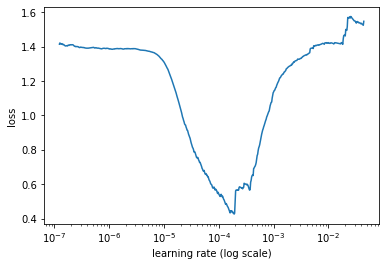

In [11]:
# step 4 [OPTIONAL] estimate the learning rate
learner.lr_find(show_plot=True, max_epochs=2)

In [31]:
learner.fit_onecycle(2e-5, 4)



begin training using onecycle policy with max lr of 2e-05...
Train for 421 steps, validate for 16 steps
Epoch 1/4
421/421 [==============================] - 107s 255ms/step - loss: 0.7692 - accuracy: 0.7533 - val_loss: 0.2873 - val_accuracy: 0.9419
Epoch 2/4
421/421 [==============================] - 100s 236ms/step - loss: 0.1423 - accuracy: 0.9628 - val_loss: 0.1931 - val_accuracy: 0.9606
Epoch 3/4
421/421 [==============================] - 100s 237ms/step - loss: 0.0508 - accuracy: 0.9893 - val_loss: 0.1118 - val_accuracy: 0.9668
Epoch 4/4
421/421 [==============================] - 100s 237ms/step - loss: 0.0189 - accuracy: 0.9976 - val_loss: 0.1151 - val_accuracy: 0.9772


In [32]:
# step 6 [OPTIONAL] inspect the model
learner.view_top_losses(n=1, preproc=t)
print(X_test[0])

----------
id:260 | loss:6.27 | true:sci.med | pred:comp.graphics)

From: whitsebd@nextwork.rose-hulman.edu (Bryan Whitsell)
Subject: Re: "Accepting Jesus in your heart..."
Reply-To: whitsebd@nextwork.rose-hulman.edu
Organization: Computer Science Department at Rose-Hulman
Lines: 7

I have been told that I seem to be very smug in my post.  I appoligize
if anyone felt this way. I did not at all desire to come across in
that way. I was trying to express that I didn't understand his logic
and that I wished him the best in his life.

In Christ's Love,
Bryan Whitsell



In [35]:
# step 7 make predictions on new data
predictor = ktrain.get_predictor(learner.model, preproc=t)
predictor.predict('Jesus Christ is the central figure of Christianity.')

'soc.religion.christian'

In [0]:
!pip3 install git+https://github.com/amaiya/eli5@tfkeras_0_10_1

In [0]:
predictor.explain('Jesus Christ is the central figure of Christianity.')

In [42]:
# step 8 [OPTIONAL] save and load predictor
#predictor.save('./my_20newsgroup_predictor')

predictor = ktrain.load_predictor('./my_20newsgroup_predictor')
predictor.get_classes()

predictor.predict('Jesus Christ is the central figure of Christianity.')

predictor.predict_proba('Jesus Christ is the central figure of Christianity.')

array([0.00870162, 0.00348248, 0.00382773, 0.9839881 ], dtype=float32)

In [49]:
y_pred_raw = predictor.predict(X_test)

In [51]:
classes = predictor.get_classes()

classes.index(y_pred_raw[0])

3

In [0]:
classes = predictor.get_classes()

y_pred = []
for i in range(len(y_pred_raw)):
  sample = y_pred_raw[i]
  y_pred.append(classes.index(sample))


In [54]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

acc

0.976063829787234

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[147,   1,   2,   2],
       [  0, 168,   0,   0],
       [  1,   3, 221,   0],
       [  7,   1,   1, 198]])

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       152
           1       0.97      1.00      0.99       168
           2       0.99      0.98      0.98       225
           3       0.99      0.96      0.97       207

    accuracy                           0.98       752
   macro avg       0.97      0.98      0.98       752
weighted avg       0.98      0.98      0.98       752

